## Models

In [102]:
from typing import List

class Rectangle:
    
    def __init__(self, width=0, height=0, x=0, y=0, ident=1):
        self.width = width
        self.height = height
        self.x = x
        self.y = y
        self.ident = ident
    
    def __str__(self):
        return f'{self.ident}: ({self.width},{self.height},{self.x},{self.y}) whxy'
    
def decodeIntList(lst: List[str]) -> List[int]:
    return list(map(int, lst))

def decodeFloatList(lst: List[str]) -> List[float]:
    return list(map(float, lst))

def decodeRectangles(lst: List[str], idents: List[str]) -> List[Rectangle]:
    return list(map(decodeRectangle, *(lst,idents)))

def decodeRectangle(rec: str, ident: str) -> Rectangle:
    x,y,w,h = rec.split(',')
    return Rectangle(x=int(x), y=int(y), width=int(w), height=int(h), ident=ident)


class Individual:
    def __init__(self, iteration: int, objectiveValue: int, facilitySequence: List[int], facilitySequenceDecoded: List[int], facilitySequenceRandomKey: List[float], slicingOrderDecoded: List[int], slicingOrderRandomKey: List[float], orientations: List[str], facilityPlacement: List[Rectangle]):
        self.iteration = iteration
        self.objectiveValue = objectiveValue
        self.facilitySequence = facilitySequence
        self.facilitySequenceDecoded = facilitySequenceDecoded
        self.facilitySequenceRandomKey = facilitySequenceRandomKey
        self.slicingOrderDecoded = slicingOrderDecoded
        self.slicingOrderRandomKey = slicingOrderRandomKey
        self.orientations = orientations
        self.facilityPlacement = facilityPlacement
        
    @staticmethod
    def create(json: dict) -> 'Individual':
        return Individual(
            iteration=int(json['iteration']),
            objectiveValue=float(json['objectiveValue']),
            facilitySequence=decodeIntList(json['facilitySequence']),
            facilitySequenceDecoded=decodeIntList(json['facilitySequenceDecoded']),
            facilitySequenceRandomKey=decodeFloatList(json['facilitySequenceRandomKey']),
            slicingOrderDecoded=decodeIntList(json['slicingOrderDecoded']),
            slicingOrderRandomKey=decodeFloatList(json['slicingOrderRandomKey']),
            orientations=json['orientations'],
            facilityPlacement=decodeRectangles(json['facilityPlacement_XYWH'], json['facilitySequence']))

class HallOfFameRecord:
    def __init__(self, iteration: int, objectiveMin: float, objectiveMax: float, objectiveAvg: float, bestIndividual: Individual):
        self.iteration = iteration
        self.objectiveMin = objectiveMin
        self.objectiveMax = objectiveMax
        self.objectiveAvg = objectiveAvg
        self.bestIndividual = bestIndividual
    
    @staticmethod
    def create(json: dict) -> 'HallOfFameRecord':
        return HallOfFameRecord(
            iteration=int(json['iteration']),
            objectiveMin=float(json['objectiveMin']),
            objectiveMax=float(json['objectiveMax']),
            objectiveAvg=float(json['objectiveAvg']),
            bestIndividual=Individual.create(json['bestIndividual']))
            
class GaResult:
    def __init__(self, bestIndividual: Individual, hallOfFame: List[HallOfFameRecord]):
        self.bestIndividual = bestIndividual
        self.hallOfFame = hallOfFame
        
    @staticmethod
    def create(json: dict) -> 'GaResult':
        return GaResult(
            bestIndividual=Individual.create(json['bestIndividual']),
            hallOfFame=list(map(HallOfFameRecord.create, json['hallOfFame']['records'])))
    
class GaParameters:
    def __init__(self, mutationProb: float, crossoverProb: float, maxNumberOfIter: int, populationSize: int, geneticAlgorithm: str, mate: str, mutate: str, select: str, metric: str, objective: str):
        self.mutationProb = mutationProb
        self.crossoverProb = crossoverProb
        self.maxNumberOfIter = maxNumberOfIter
        self.populationSize = populationSize
        self.geneticAlgorithm = geneticAlgorithm
        self.mate = mate
        self.mutate = mutate
        self.select = select
        self.metric = metric
        self.objective = objective
        
    @staticmethod
    def create(json: dict) -> 'GaParameters':
        return GaParameters(
            mutationProb=float(json['mutationProb']),
            crossoverProb=float(json['crossoverProb']),
            maxNumberOfIter=int(json['maxNumberOfIter']),
            populationSize=int(json['populationSize']),
            geneticAlgorithm=json['geneticAlgorithm'],
            mate=json['mate'],
            mutate=json['mutate'],
            select=json['select'],
            metric=json['metric'],
            objective=json['objective'])

class Layout:
    def __init__(self, width: int, height: int):
        self.width = width
        self.height = height
        self.boundingRectangle = Rectangle(width=width, height=height, x=0, y=0, ident="")
        
    @staticmethod
    def create(json: dict) -> 'Layout':
        return Layout(width=json['width'], height=json['height'])
    

class Dimension:
    def __init__(self, facility: str, area: float):
        self.facility = facility
        self.area = area
        
    @staticmethod
    def create(json: dict) -> 'Dimension':
        return Dimension(facility=json['facility'], area=float(json['area']))
        
class Flow:
    def __init__(self, ffrom: str, to: str, flow: float):
        self.ffrom = ffrom
        self.to = to
        self.flow = flow
        
    @staticmethod
    def create(json: dict) -> 'Flow':
        return Flow(ffrom=json['from'], to=json['to'], flow=float(json['flow']))
    
class InstanceParameters:
    def __init__(self, facilityCount: int, emptySpace: int, layout: Layout, dimension: List[Dimension], flow: List[Flow]):
        self.facilityCount = facilityCount
        self.emptySpace = emptySpace
        self.layout = layout
        self.dimension = dimension
        self.flow = flow
        
    @staticmethod
    def create(json: dict) -> 'InstanceParameters':
        return InstanceParameters(
            facilityCount=int(json['facilityCount']),
            emptySpace=int(json['emptySpace']),
            layout=Layout.create(json['layout']),
            dimension=list(map(Dimension.create, json['dimension'])),
            flow=list(map(Flow.create, json['flow'])))
    
    
class ComputationResult:
    def __init__(self, durationMillis: int, gaResult: GaResult, gaParameters: GaParameters, instanceParameters: InstanceParameters):
        self.durationMillis = durationMillis
        self.gaResult = gaResult
        self.gaParameters = gaParameters
        self.instanceParameters = instanceParameters
    
    @staticmethod
    def createWithName(name: str, json: dict) -> 'ComputationResult':
        res = ComputationResult.create(json)
        res.name = name
        return res
        
    @staticmethod
    def create(json: dict) -> 'ComputationResult':
        return ComputationResult(
            durationMillis=int(json['durationMillis']),
            gaResult=GaResult.create(json['gaResult']),
            gaParameters=GaParameters.create(json['gaParameters']),
            instanceParameters=InstanceParameters.create(json['instanceParameters']))

In [2]:
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 150

def draw_rectangles(recs: List[Rectangle], grid: Rectangle, show_ident=True) -> None:
    def to_matplotlib_rec(rec):
        return matplotlib.patches.Rectangle(
            (rec.x, rec.y),
            width=rec.width,height=rec.height,
            edgecolor='blue',
            linewidth=1.3,
            fill=False,
        )
    fig, ax = plt.subplots()
    
    for rec in recs:
        ax.add_patch(to_matplotlib_rec(rec))
        if show_ident:
            ax.text(rec.x+rec.width/2, rec.y+rec.height/2, rec.ident, fontsize=8)


    ax.set_xlim(left=-1, right=grid.width+1)
    ax.set_ylim(bottom=-1, top=grid.height)
    ax.set_title(f'Slicing layout', fontsize=8)
    
    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)    
    
    plt.show()

## Loading computation result

In [121]:
from pathlib import Path
import json

DATASET_DIR = '/home/slarty/Documents/master-thesis/src/impl/out'
COMPUTATIONAL_RESULT_FILE_NAME = 'computation_result.json'

def _getDirPrefix(name: str) -> int:
    return int(name.split('_')[0])

def loadLatestComputationResult() -> ComputationResult:
    dirs = [x for x in Path(DATASET_DIR).iterdir() if x.is_dir()]
    latest, prefix = dirs[0], _getDirPrefix(dirs[0].name)
    for d in dirs:
        k = _getDirPrefix(d.name)
        if k > prefix:
            latest, prefix = d, k
    print(f'loading: {latest.resolve()}')
    return loadComputationResult(str(latest.resolve()))
    

def loadComputationResult(path: str) -> ComputationResult:
    with open(path + '/' + COMPUTATIONAL_RESULT_FILE_NAME, 'r') as f:
        data = json.load(f)
    return ComputationResult.createWithName(path.split('/')[-1], data)

## Drawing

In [127]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math

plt.rcParams['figure.dpi'] = 150

def drawRectangles(recs: List[Rectangle], grid: Rectangle, show_ident=True, title=None) -> None:
    def to_matplotlib_rec(rec):
        return matplotlib.patches.Rectangle(
            (rec.x, rec.y),
            width=rec.width,height=rec.height,
            edgecolor='blue',
            linewidth=1.3,
            fill=False,
        )
    fig, ax = plt.subplots()
    
    for rec in recs:
        ax.add_patch(to_matplotlib_rec(rec))
        if show_ident:
            ax.text(rec.x+rec.width/2, rec.y+rec.height/2, rec.ident, fontsize=8)


    ax.set_xlim(left=-1, right=grid.width+1)
    ax.set_ylim(bottom=-1, top=grid.height)
    ax.set_title(f'{title or "Slicing layout"}', fontsize=8)
    
    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)    
    
    plt.show()
    
def getAxSize(ax):
    """source: unutbu, https://stackoverflow.com/a/19306776/6784881"""
    bbox = ax.get_window_extent()
    width, height = bbox.width, bbox.height
    return width, height

def getAxHeight(ax):
    return getAxSize(ax)[1]
    
def createParameterDigest(res: ComputationResult) -> str:
    return f'alg={res.gaParameters.geneticAlgorithm}, popSize={res.gaParameters.populationSize}'

def hallOfFameStatisticsToDataframe(res: ComputationResult) -> pd.DataFrame:
    data = []
    for hof in computationResult.gaResult.hallOfFame:
        data.append((hof.iteration, hof.objectiveMin, hof.objectiveMax, hof.objectiveAvg))
    return pd.DataFrame(data, columns=['iteration', 'min', 'max', 'avg']).set_index('iteration', inplace=False)
    

def describeComputationResult(res: ComputationResult) -> None:
    ax = hallOfFameStatisticsToDataframe(res).plot(ylabel='objective', title=f'{res.name}')
    ax.title.set_size(10)
    xb, yb = res.gaResult.bestIndividual.iteration, res.gaResult.bestIndividual.objectiveValue
    ax.scatter([xb], [yb], color='black', s=30)
    ax.annotate('best', (xb, yb+0.3*getAxHeight(ax)))
    
    drawRectangles(res.gaResult.bestIndividual.facilityPlacement, res.instanceParameters.layout.boundingRectangle, title=f'Slicing layout, best individual\nobjective={res.gaResult.bestIndividual.objectiveValue}, iteration={res.gaResult.bestIndividual.iteration}')

## Results

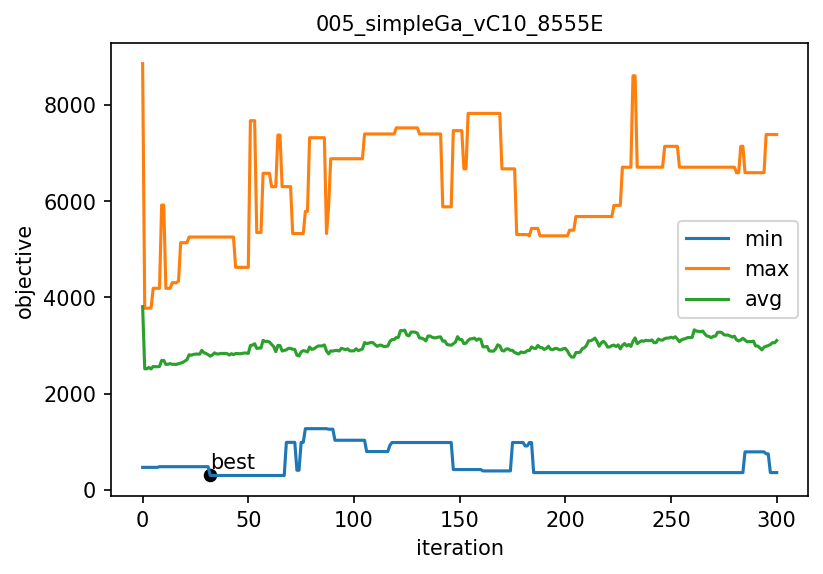

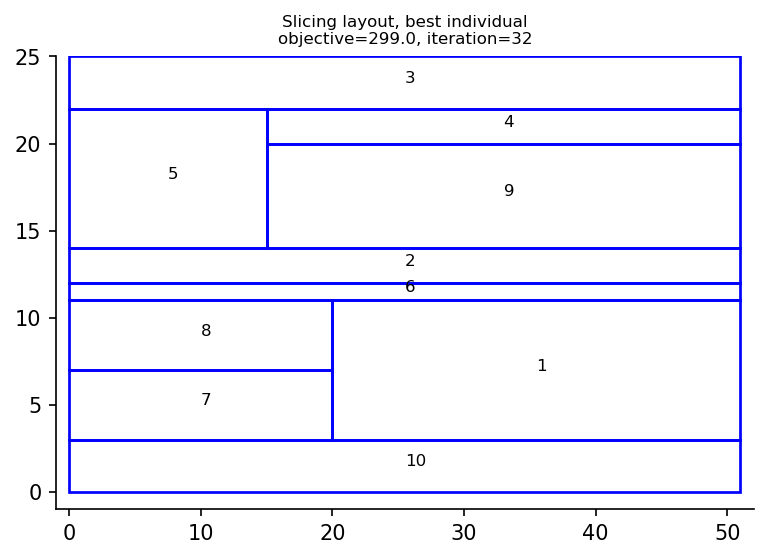

In [128]:
vC10 = loadComputationResult('/home/slarty/Documents/master-thesis/src/impl/out/005_simpleGa_vC10_8555E')    
describeComputationResult(vC10)

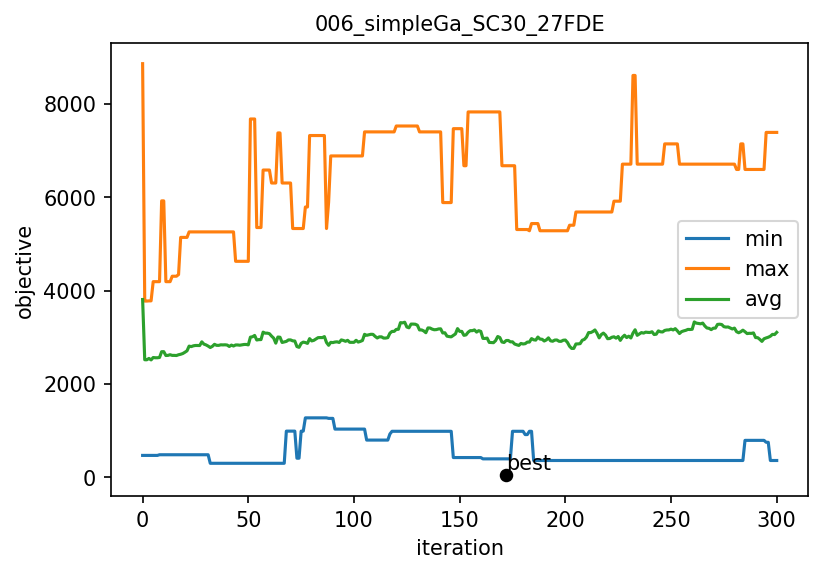

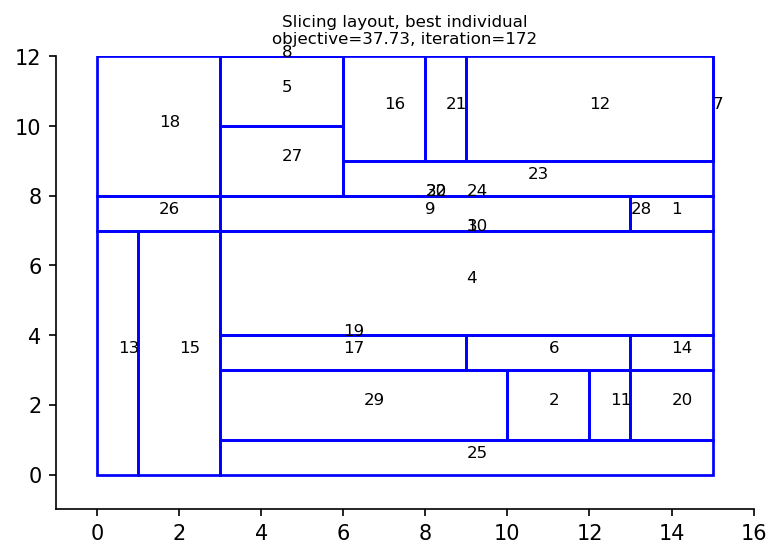

In [129]:
SC30 = loadComputationResult('/home/slarty/Documents/master-thesis/src/impl/out/006_simpleGa_SC30_27FDE')    
describeComputationResult(SC30)